# Import libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, confusion_matrix, f1_score, precision_recall_curve, roc_curve, plot_roc_curve, plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from lightgbm import LGBMClassifier, plot_importance

In [2]:
# Unzip archive
!unzip -o employee_promotion.csv.zip

Archive:  employee_promotion.csv.zip
  inflating: employee_promotion.csv  


In [3]:
# Load data
data = pd.read_csv('employee_promotion.csv')
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


## Dataset Overview
|        Column        |                                         Descriptions                                        |
|:--------------------:|:-------------------------------------------------------------------------------------------:|
| employee_id          | Unique ID for the employee                                                                  |
| department           | Department of employee                                                                      |
| region               | Region of employment(unordered)                                                             |
| education            | Education level                                                                             |
| gender               | Gender of Employee                                                                          |
| recruitment_channel  | Channel of recruitment for employee                                                         |
| no_of_trainings      | no of other trainings completed in the previous year on soft skills, technical skills, etc. |
| age                  | Age of Employee                                                                             |
| previous_year_rating | Employee Rating for the previous year                                                       |
| length_of_service    | Length of service in years                                                                  |
| awards_won           | if awards won during the previous year then 1 else 0                                        |
| avg_training_score   | Average score in current training evaluations                                               |
| is_promoted          | Recommended for promotion                                                                   |

# Data Preprocessing

In [4]:
# Check whether any columns contain NaN or Null values
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [5]:
# We have lots of data, specifically over 10000
# Therefore, I decided to drop rows contain NaN or Null
data.dropna(axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [6]:
# 'emplye_id' column is unnecessary so, I gonna drop for it
data.drop(columns=['employee_id'], inplace=True)
data

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49.0,0
46376,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
46377,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
46378,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0


In [7]:
# Convert 'gender' column into binary values
data['gender_new'] = pd.Series()
data.loc[data['gender'] == 'f', 'gender_new'] = 0
data.loc[data['gender'] == 'm', 'gender_new'] = 1
data = data.astype({'gender_new' : 'int'})
data.drop(columns=['gender'], inplace=True)
data

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_new
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,0,49.0,0,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,60.0,0,1
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,50.0,0,1
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,50.0,0,1
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,73.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,other,2,31,1.0,2,0,49.0,0,1
46376,Technology,region_14,Bachelor's,sourcing,1,48,3.0,17,0,78.0,0,1
46377,Operations,region_27,Master's & above,other,1,37,2.0,6,0,56.0,0,0
46378,Analytics,region_1,Bachelor's,other,1,27,5.0,3,0,79.0,0,1


## Comment
Finally, we got preprocessed DataFrame named 'data'.  
It has no NaN or Null values, therefore it is good to go for machine learning.

# Data Visualization

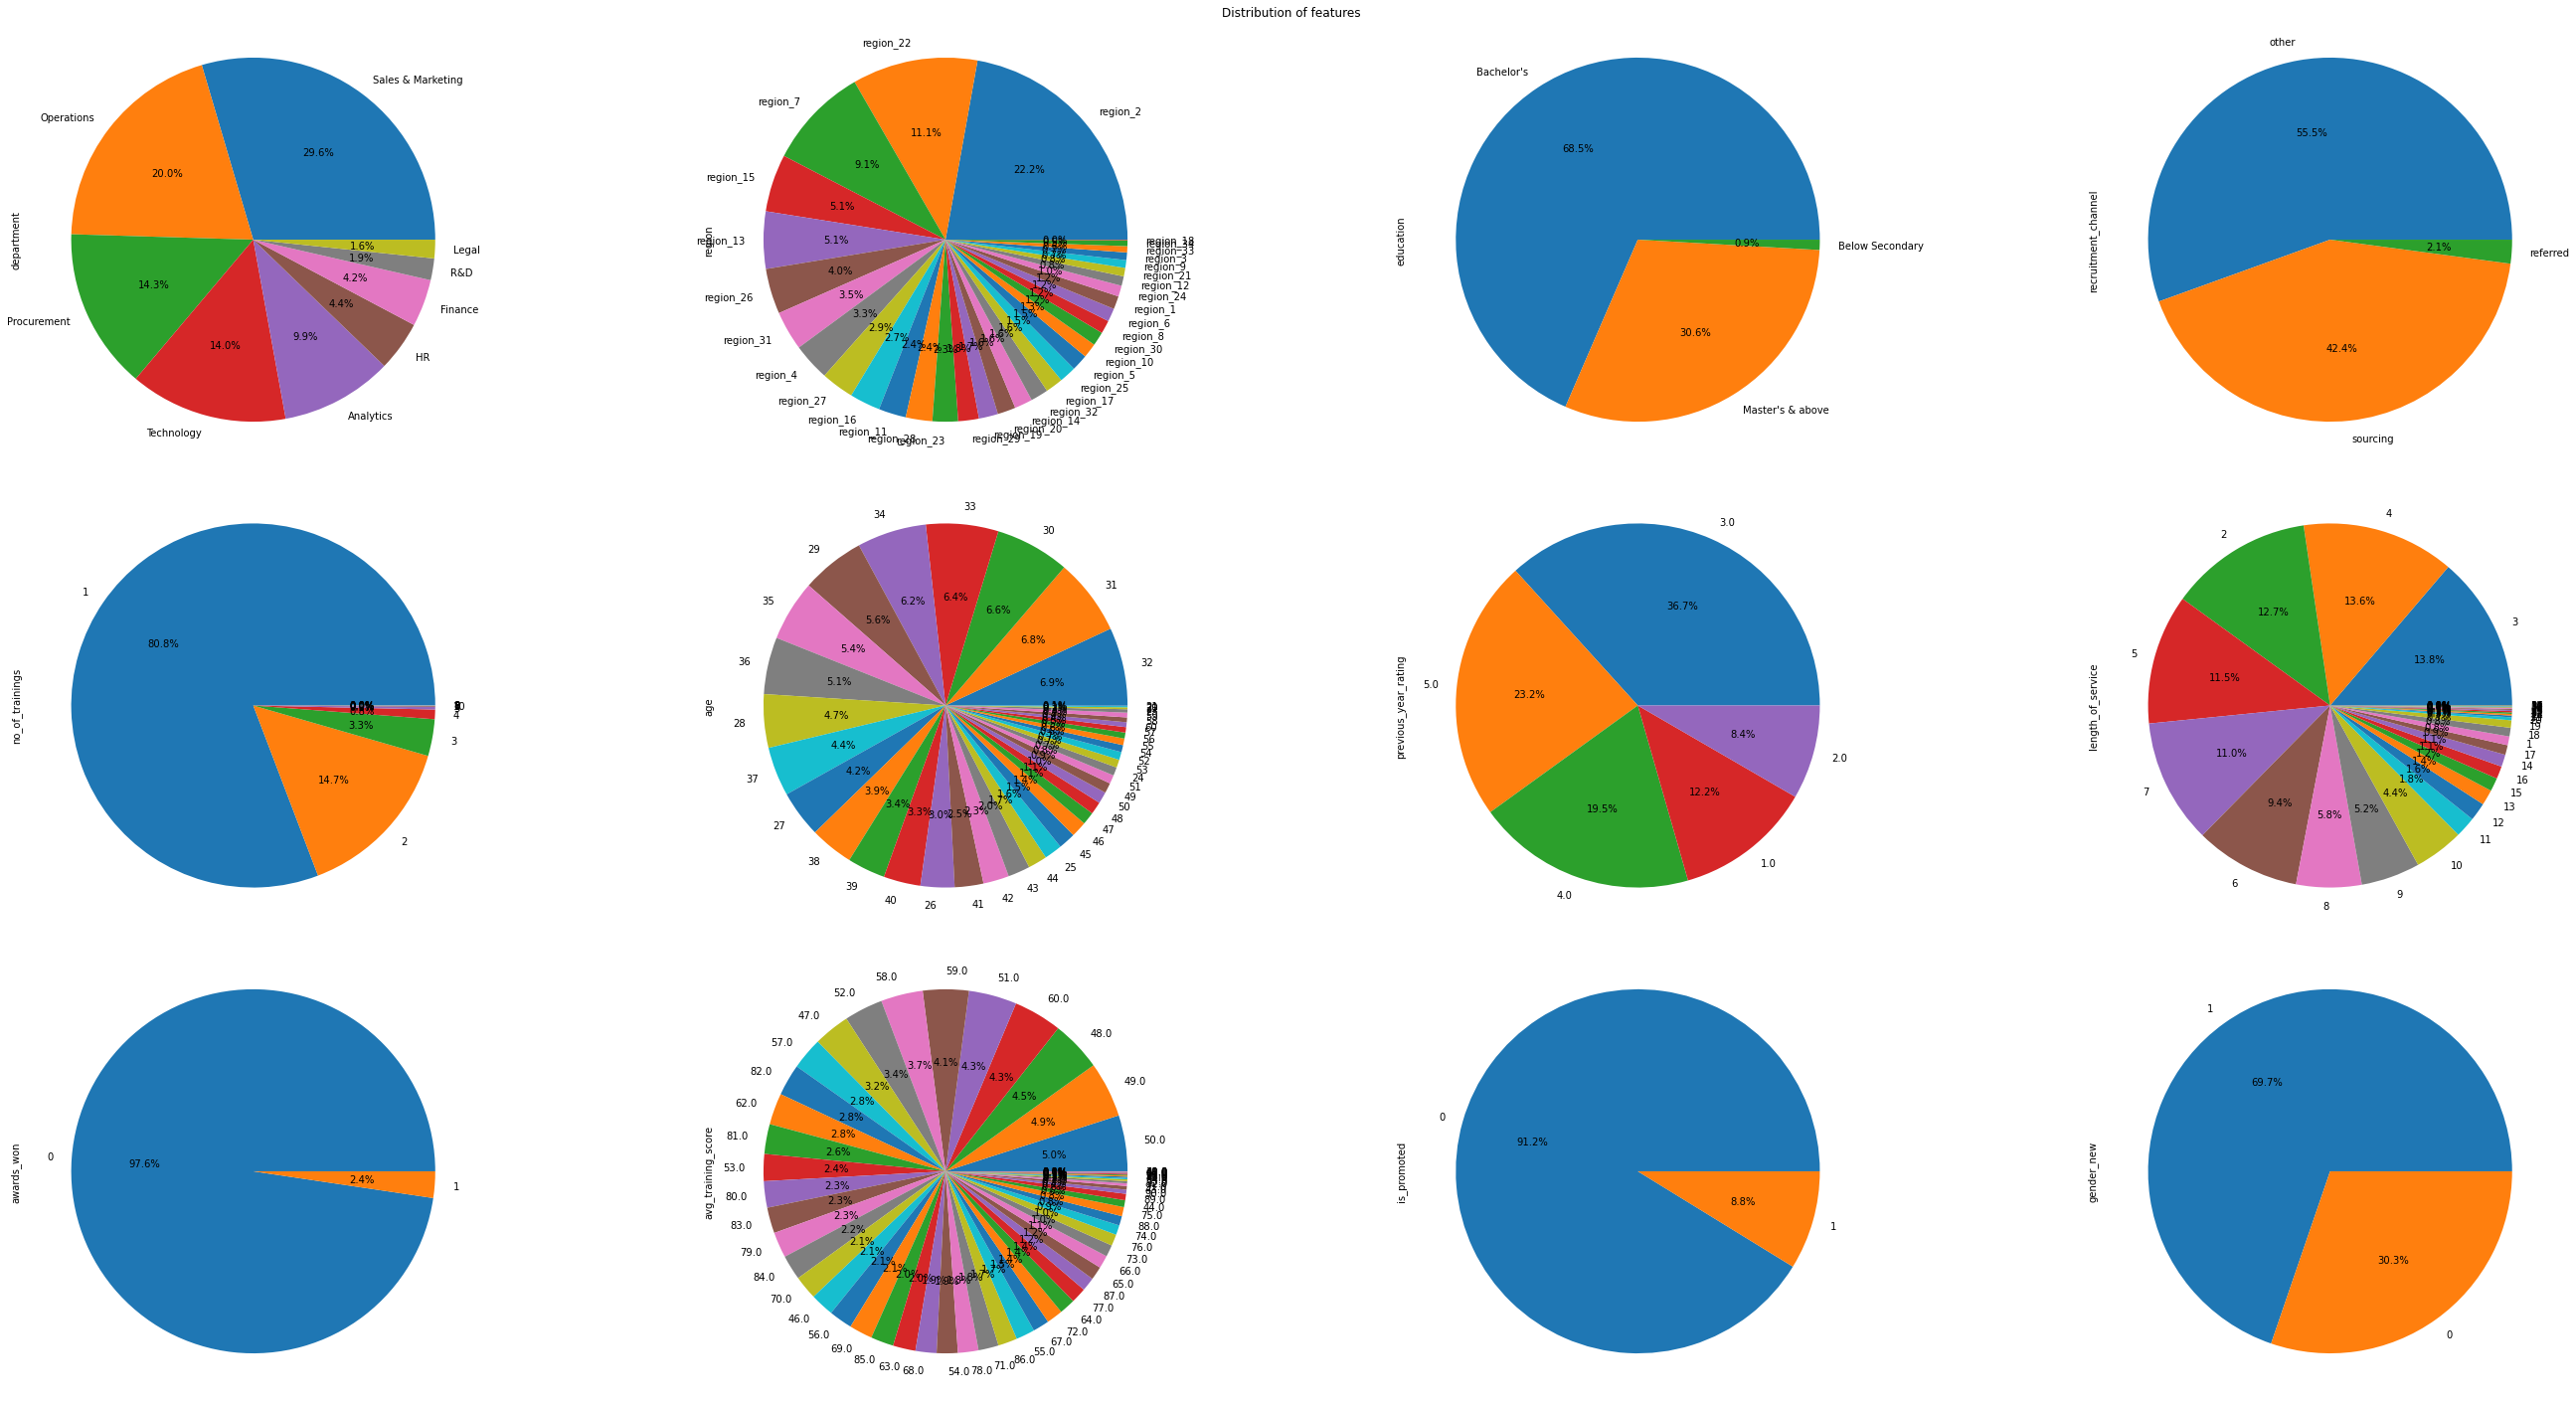

In [8]:
# Check distributions of features for training by pie charts
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(40, 20))

for i, feature in enumerate(data.columns):
    row = int(i/4)
    col = i%4
    pd.value_counts(data.iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distribution of features')
plt.tight_layout()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

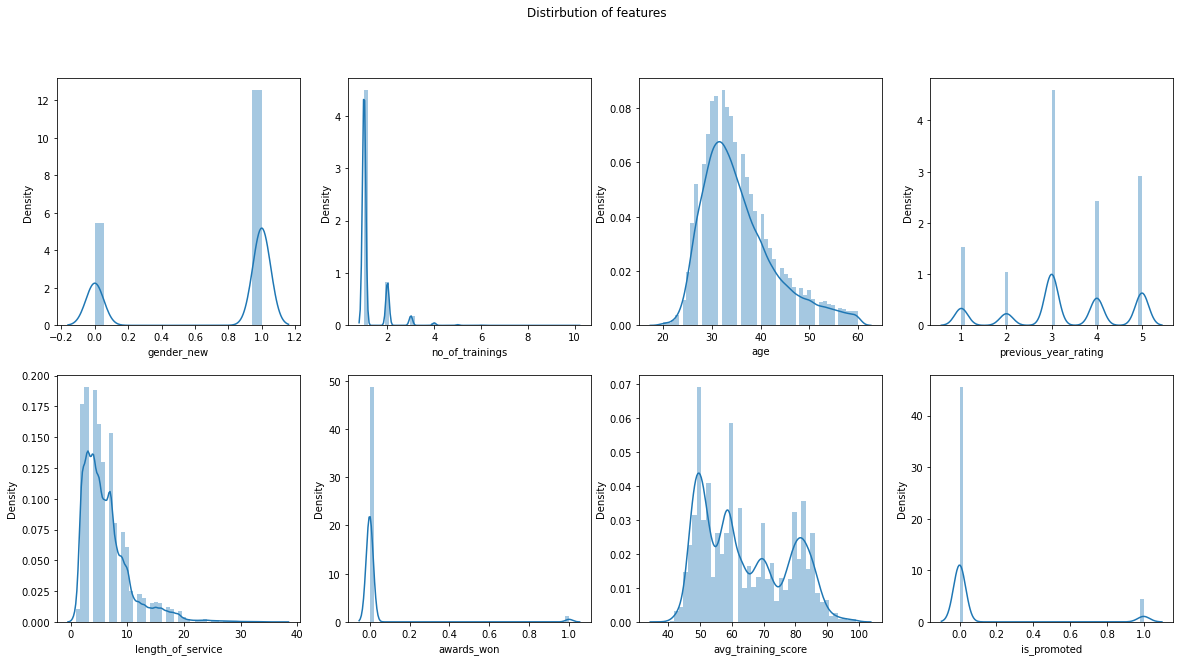

In [9]:
# Check distributions of features contain numbers by distplot
columns = ['gender_new', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(data[columns]):
    row = int(i/4)
    col = i%4
    sns.distplot(data[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

## Comment
As you can see above, none of columns have normal distribution which is proper for training  
Therefore, we can try converting following columns for normal distribution: 'age', 'length_of_service' and 'avg_training_score' 

In [10]:
data

,department,region,education,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,gender_new
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,5.0,8,0,49.0,0,0
1,Operations,region_22,Bachelor's,other,1,30,5.0,4,0,60.0,0,1
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.0,7,0,50.0,0,1
3,Sales & Marketing,region_23,Bachelor's,other,2,39,1.0,10,0,50.0,0,1
4,Technology,region_26,Bachelor's,other,1,45,3.0,2,0,73.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,other,2,31,1.0,2,0,49.0,0,1
46376,Technology,region_14,Bachelor's,sourcing,1,48,3.0,17,0,78.0,0,1
46377,Operations,region_27,Master's & above,other,1,37,2.0,6,0,56.0,0,0
46378,Analytics,region_1,Bachelor's,other,1,27,5.0,3,0,79.0,0,1


In [11]:
# Log Transformation
age_log = np.log1p(data['age'])
service_log = np.log1p(data['length_of_service'])
score_log = np.log1p(data['avg_training_score'])

data.insert(6, 'age_log', age_log)
data.insert(9, 'length_of_service_log', service_log)
data.insert(12, 'avg_training_score_log', score_log)

data

,department,region,education,recruitment_channel,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won,avg_training_score,avg_training_score_log,is_promoted,gender_new
0,Sales & Marketing,region_7,Master's & above,sourcing,1,35,3.583519,5.0,8,2.197225,0,49.0,3.912023,0,0
1,Operations,region_22,Bachelor's,other,1,30,3.433987,5.0,4,1.609438,0,60.0,4.110874,0,1
2,Sales & Marketing,region_19,Bachelor's,sourcing,1,34,3.555348,3.0,7,2.079442,0,50.0,3.931826,0,1
3,Sales & Marketing,region_23,Bachelor's,other,2,39,3.688879,1.0,10,2.397895,0,50.0,3.931826,0,1
4,Technology,region_26,Bachelor's,other,1,45,3.828641,3.0,2,1.098612,0,73.0,4.304065,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,Sales & Marketing,region_14,Bachelor's,other,2,31,3.465736,1.0,2,1.098612,0,49.0,3.912023,0,1
46376,Technology,region_14,Bachelor's,sourcing,1,48,3.891820,3.0,17,2.890372,0,78.0,4.369448,0,1
46377,Operations,region_27,Master's & above,other,1,37,3.637586,2.0,6,1.945910,0,56.0,4.043051,0,0
46378,Analytics,region_1,Bachelor's,other,1,27,3.332205,5.0,3,1.386294,0,79.0,4.382027,0,1


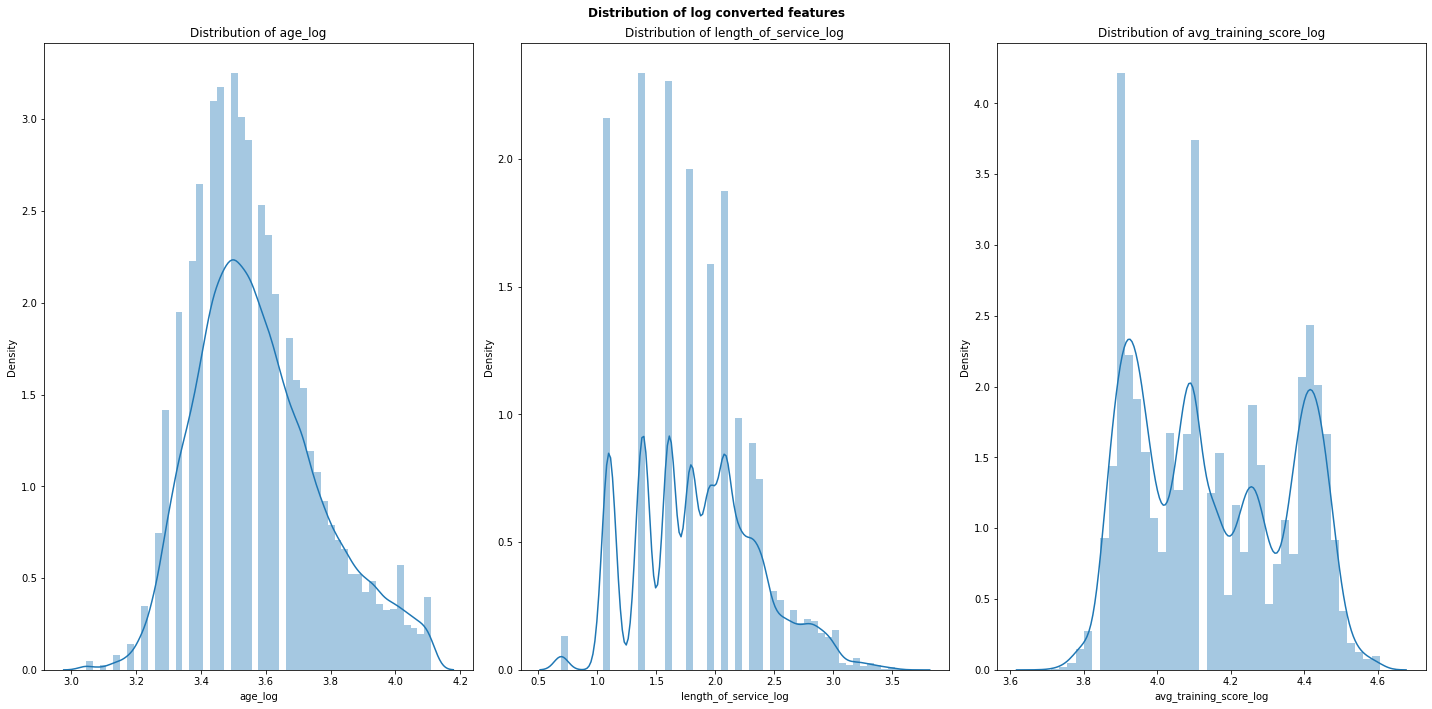

In [12]:
# Check distributions of log converted columns
log_columns = ['age_log', 'length_of_service_log', 'avg_training_score_log']

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

sns.distplot(data['age_log'], ax=ax1)
ax1.set_title('Distribution of age_log')
sns.distplot(data['length_of_service_log'], ax=ax2)
ax2.set_title('Distribution of length_of_service_log')
sns.distplot(data['avg_training_score_log'], ax=ax3)
ax3.set_title('Distribution of avg_training_score_log')

plt.suptitle('Distribution of log converted features', fontweight='bold')
plt.tight_layout()
plt.show()

## Comment
'age_log' became nearly normal distributed but other features didn't  
Log transformation is one of the most powerful strategies of preparing data for training

<AxesSubplot:title={'center':'Correlation of features'}>

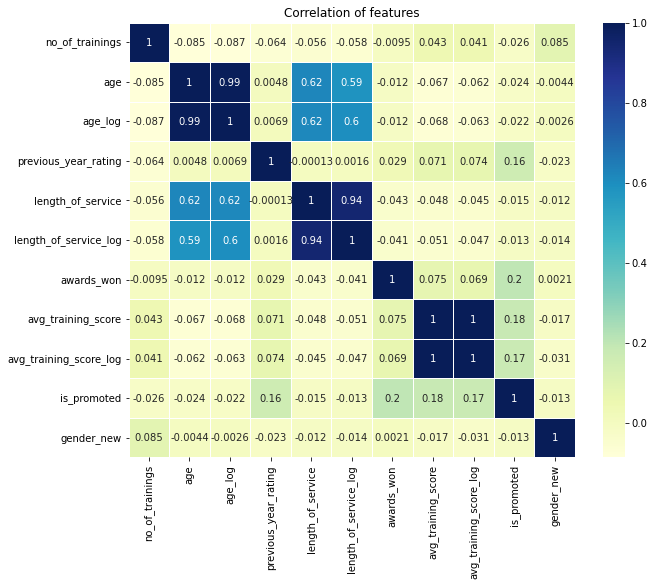

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(data.corr(), annot=True, linewidths=.5, cmap="YlGnBu")

## Comment
As I anticipated, 'age', 'length of service' and 'avg_training_score' was highly correlated  
So, maybe I can try decomposition for those features (To be Continued)

# Split Datasets

In [14]:
# Get One-Hot encoded DataFrame
data_oh = pd.get_dummies(data)
data_oh

,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won,avg_training_score,avg_training_score_log,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,3.583519,5.0,8,2.197225,0,49.0,3.912023,0,...,0,1,0,0,0,0,1,0,0,1
1,1,30,3.433987,5.0,4,1.609438,0,60.0,4.110874,0,...,0,0,0,0,1,0,0,1,0,0
2,1,34,3.555348,3.0,7,2.079442,0,50.0,3.931826,0,...,0,0,0,0,1,0,0,0,0,1
3,2,39,3.688879,1.0,10,2.397895,0,50.0,3.931826,0,...,0,0,0,0,1,0,0,1,0,0
4,1,45,3.828641,3.0,2,1.098612,0,73.0,4.304065,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,2,31,3.465736,1.0,2,1.098612,0,49.0,3.912023,0,...,0,0,0,0,1,0,0,1,0,0
46376,1,48,3.891820,3.0,17,2.890372,0,78.0,4.369448,0,...,0,0,0,0,1,0,0,0,0,1
46377,1,37,3.637586,2.0,6,1.945910,0,56.0,4.043051,0,...,0,0,0,0,0,0,1,1,0,0
46378,1,27,3.332205,5.0,3,1.386294,0,79.0,4.382027,0,...,0,0,0,0,1,0,0,1,0,0


In [15]:
# Scaling of features
features = np.array(data_oh.columns).reshape(-1, 1)

for feature in features:
    scaler = StandardScaler()
    scaler.fit(data_oh[feature])
    data_oh[feature] = scaler.transform(data_oh[feature])

data_oh

,no_of_trainings,age,age_log,previous_year_rating,length_of_service,length_of_service_log,awards_won,avg_training_score,avg_training_score_log,is_promoted,...,region_region_6,region_region_7,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,-0.418611,-0.076052,0.019377,1.324653,0.402667,0.673784,-0.155136,-1.111888,-1.177045,-0.310195,...,-0.108942,3.169047,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,-1.117074,-0.146768,1.166064
1,-0.418611,-0.740379,-0.749600,1.324653,-0.549239,-0.474482,-0.155136,-0.292548,-0.202848,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,0.895195,-0.146768,-0.857586
2,-0.418611,-0.208918,-0.125493,-0.263965,0.164690,0.443690,-0.155136,-1.037403,-1.080029,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-1.117074,-0.146768,1.166064
3,1.226184,0.455409,0.561202,-1.852582,0.878619,1.065803,-0.155136,-1.037403,-1.080029,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,0.895195,-0.146768,-0.857586
4,-0.418611,1.252601,1.279937,-0.263965,-1.025192,-1.472401,-0.155136,0.675764,0.743621,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,0.895195,-0.146768,-0.857586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46375,1.226184,-0.607514,-0.586330,-1.852582,-1.025192,-1.472401,-0.155136,-1.111888,-1.177045,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,0.895195,-0.146768,-0.857586
46376,-0.418611,1.651196,1.604839,-0.263965,2.544454,2.027877,-0.155136,1.048192,1.063940,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,-1.117074,-0.146768,1.166064
46377,-0.418611,0.189678,0.297422,-1.058273,-0.073286,0.182831,-0.155136,-0.590490,-0.535120,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,-1.474410,-0.09548,1.505848,0.895195,-0.146768,-0.857586
46378,-0.418611,-1.138975,-1.273025,1.324653,-0.787215,-0.910402,-0.155136,1.122677,1.125565,-0.310195,...,-0.108942,-0.315552,-0.109043,-0.083089,0.678237,-0.09548,-0.664078,0.895195,-0.146768,-0.857586


In [16]:
# Define features and label for training
train_features = data_oh.drop(columns=['is_promoted'], inplace=False)
train_label = data_oh['is_promoted'].astype(int)

In [17]:
# Split datasets
X_train, X_test, y_train, y_test = train_test_split(train_features, train_label, test_size=0.2, random_state=11)

print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (37104, 59)
Shape of X_test:  (9276, 59)
Shape of y_train:  (37104,)
Shape of y_test:  (9276,)


# Classification

## Basic Estimators

In [18]:
# Utility Function
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, average="macro")
    recall = recall_score(y_test, pred, average="macro")
    f1 = f1_score(y_test, pred, average="macro")
    roc_auc = roc_auc_score(y_test, pred_proba, average="macro")
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [19]:
# Process fitting, prediction and evalution by Logistic Regression
# Create Estimator CLass
dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

# Fitting
dt_clf.fit(X_train, y_train)
lr_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Prediction
dt_pred = dt_clf.predict(X_test)
lr_pred = lr_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

# Pred_Proba
dt_pred_proba = dt_clf.predict_proba(X_test)[:, 1]
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]
rf_pred_proba = rf_clf.predict_proba(X_test)[:, 1]

# Evaluation
get_clf_eval(y_test, dt_pred, dt_pred_proba)
get_clf_eval(y_test, lr_pred, lr_pred_proba)
get_clf_eval(y_test, rf_pred, rf_pred_proba)

Confusion Matrix
[[7874  599]
 [ 426  377]]
Accuracy: 0.8895, Precision: 0.6675, Recall 0.6994, F1: 0.6814, AUC:0.6993
Confusion Matrix
[[8458   15]
 [ 515  288]]
Accuracy: 0.9429, Precision: 0.9466, Recall 0.6784, F1: 0.7452, AUC:0.8070
Confusion Matrix
[[8448   25]
 [ 506  297]]
Accuracy: 0.9428, Precision: 0.9329, Recall 0.6835, F1: 0.7488, AUC:0.7949


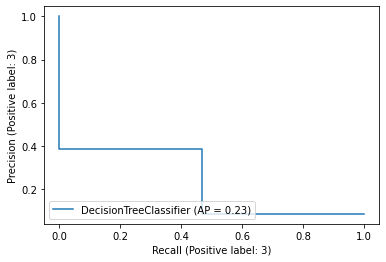

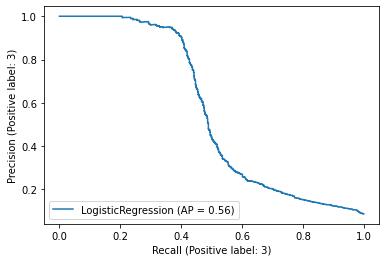

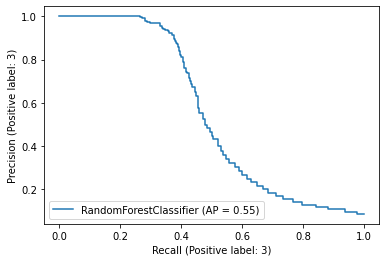

In [20]:
# Plot Precision-Recall curve
plot_precision_recall_curve(dt_clf, X_test, y_test)
plot_precision_recall_curve(lr_clf, X_test, y_test)
plot_precision_recall_curve(rf_clf, X_test, y_test)
plt.show()

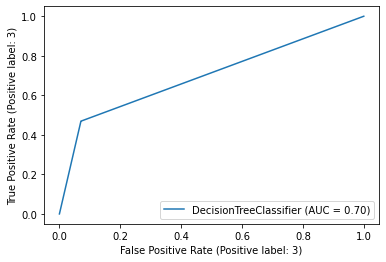

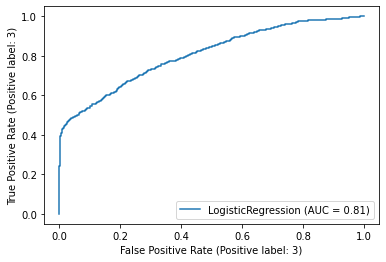

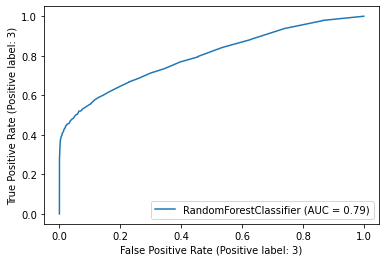

In [21]:
# Plot ROC curve
plot_roc_curve(dt_clf, X_test, y_test)
plot_roc_curve(lr_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test)
plt.show()

### Comment
As you can see above, LogisticRegression and RandomForestClassifier are both basic models but really powerful

## LightGBM

Confusion Matrix
[[8392   81]
 [ 468  335]]
Accuracy: 0.9408, Precision: 0.8762, Recall 0.7038, F1: 0.7590, AUC:0.8152


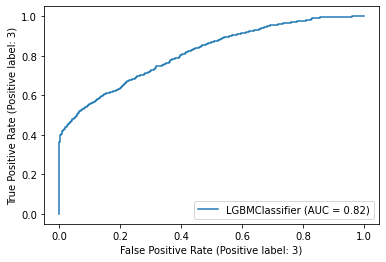

In [22]:
# Create estimator and process fitting, prediction and evaluation for model after applying SMOTE
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)

lgbm_clf.fit(X_train, y_train)
lgbm_preds_over = lgbm_clf.predict(X_test)
lgbm_pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, lgbm_preds_over, lgbm_pred_proba)
plot_roc_curve(lgbm_clf, X_test, y_test)

In [23]:
# Create estimator and process fitting, prediction and evaluation for model
lgbm_wrapper = LGBMClassifier(n_estimators=400, num_leaves=64, n_jobs=-1, boost_from_average=False)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=1200, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

[1]	valid_0's binary_logloss: 0.618231
Training until validation scores don't improve for 1200 rounds
[2]	valid_0's binary_logloss: 0.557051
[3]	valid_0's binary_logloss: 0.506116
[4]	valid_0's binary_logloss: 0.463184
[5]	valid_0's binary_logloss: 0.426587
[6]	valid_0's binary_logloss: 0.395593
[7]	valid_0's binary_logloss: 0.369138
[8]	valid_0's binary_logloss: 0.346575
[9]	valid_0's binary_logloss: 0.326873
[10]	valid_0's binary_logloss: 0.310296
[11]	valid_0's binary_logloss: 0.296102
[12]	valid_0's binary_logloss: 0.282965
[13]	valid_0's binary_logloss: 0.27152
[14]	valid_0's binary_logloss: 0.261609
[15]	valid_0's binary_logloss: 0.252928
[16]	valid_0's binary_logloss: 0.245789
[17]	valid_0's binary_logloss: 0.239263
[18]	valid_0's binary_logloss: 0.23392
[19]	valid_0's binary_logloss: 0.228856
[20]	valid_0's binary_logloss: 0.224366
[21]	valid_0's binary_logloss: 0.220649
[22]	valid_0's binary_logloss: 0.217218
[23]	valid_0's binary_logloss: 0.214103
[24]	valid_0's binary_loglos

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

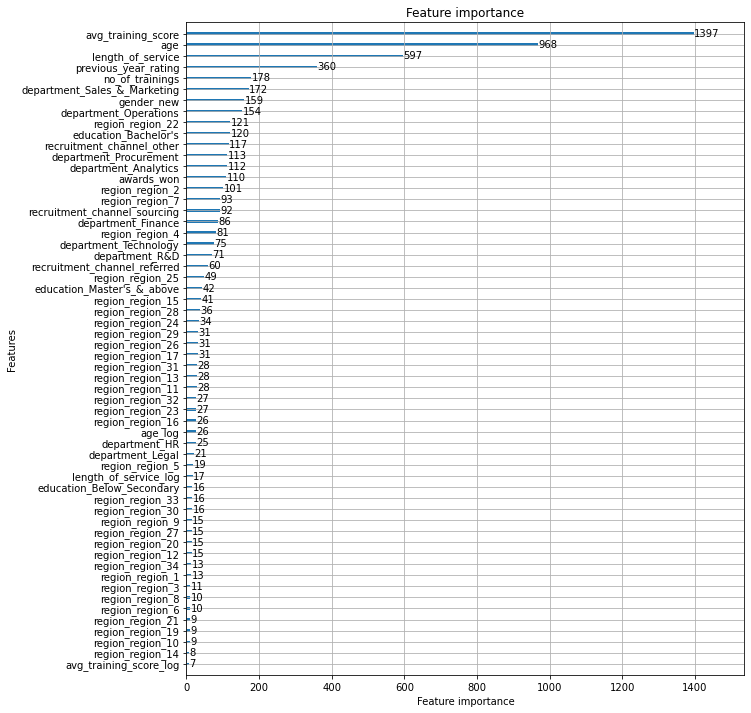

In [24]:
# Plot Feature importance
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### Comment
LightGBM is also another powerful model which runs by Boosting(Boot Strapping)  
It is more lighter than GradientBoostingClassifier(literally)  
Specifically, comparing to basic estimators, AUC score was the highest

## Stacking Ensemble

In [25]:
# Create individual ML model
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=11)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# Create the model which will be fitted by dataset Stacking processed
lr_final = LogisticRegression(C=10)

In [26]:
# Fitting each models
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [27]:
# Predict each models and predict them

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('Accuracy Score of KNN: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('Accuracy Score of RandomForestClassifier: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('Accuracy Score of DeicisionTreeClassifier: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('Accuracy Score of AdaBoostClassifier: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

Accuracy Score of KNN: 0.9166
Accuracy Score of RandomForestClassifier: 0.9420
Accuracy Score of DeicisionTreeClassifier: 0.8858
Accuracy Score of AdaBoostClassifier: 0.9315


In [28]:
# Combine preds to one ndarray
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# Transponse 'pred' in order to convert as Feature
pred = np.transpose(pred)
print(pred.shape)

(4, 9276)
(9276, 4)


In [29]:
# Fit, Predict, Evaluate for final model
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('Accuracy Score of Final Model: {0:.4f}'.format(accuracy_score(y_test, final)))

Accuracy Score of Final Model: 0.9426


# Conclusion
**Accuracy Score of Final Model: 0.9428**

1. Through trraining basic estimators, LightGBM and ensemble models, I could try lots of estimators for this datset.  
2. Especially, the label for training was binary (which is 0 or 1) so, the evaluation score seems much higher than those from multi-classification.  
3. Also, ensemble and nearest-neighbor model became ditinguished, therefore, visualzing scatter plot could be another good way for analyzing data.

Thanks for reviewing my notebooks  
If you'd like it, please give me upvotes and leave comments  
Any questions or comments are always welcome